# Data Collection

In [19]:
import pandas as pd

In [20]:
# Load previously created Audio features Dataset
file_path = 'C:/Users/Victor Cardenas/Documents/dataset_projects/spotify_streaming/audio_features.csv'
audio_features = pd.read_csv(file_path, encoding='latin1')

# Load Spotify Most Streamed dataset
file_path = 'C:/Users/Victor Cardenas/Documents/dataset_projects/spotify_streaming/Most Streamed Spotify Songs 2024.csv'
spotify_data = pd.read_csv(file_path, encoding='latin1')

# Data Preparation

In [21]:
# Convert all columns to numeric, ignoring non-numeric
numeric_df = audio_features.select_dtypes(include=['float64', 'int64'])

# Drop the "TIDAL popularity" column within Spotify Dataset
spotify_data = spotify_data.drop(columns=['TIDAL Popularity'])

# Merge the datasets on the 'Track' column
merged_df = pd.merge(spotify_data, audio_features, on='Track', how='inner')  # Use 'inner' to keep only common tracks, or 'outer' for all tracks

# Check for common tracks
common_tracks = spotify_data['Track'].isin(audio_features['Track'])

# Filter spotify_data to only include common tracks
spotify_data_common = spotify_data[common_tracks]

# Merge spotify_data_common with audio_features on 'Track'
merged_df = pd.merge(spotify_data_common, audio_features, on='Track', how='inner')


# Exploratory Data Understanding (EDA)

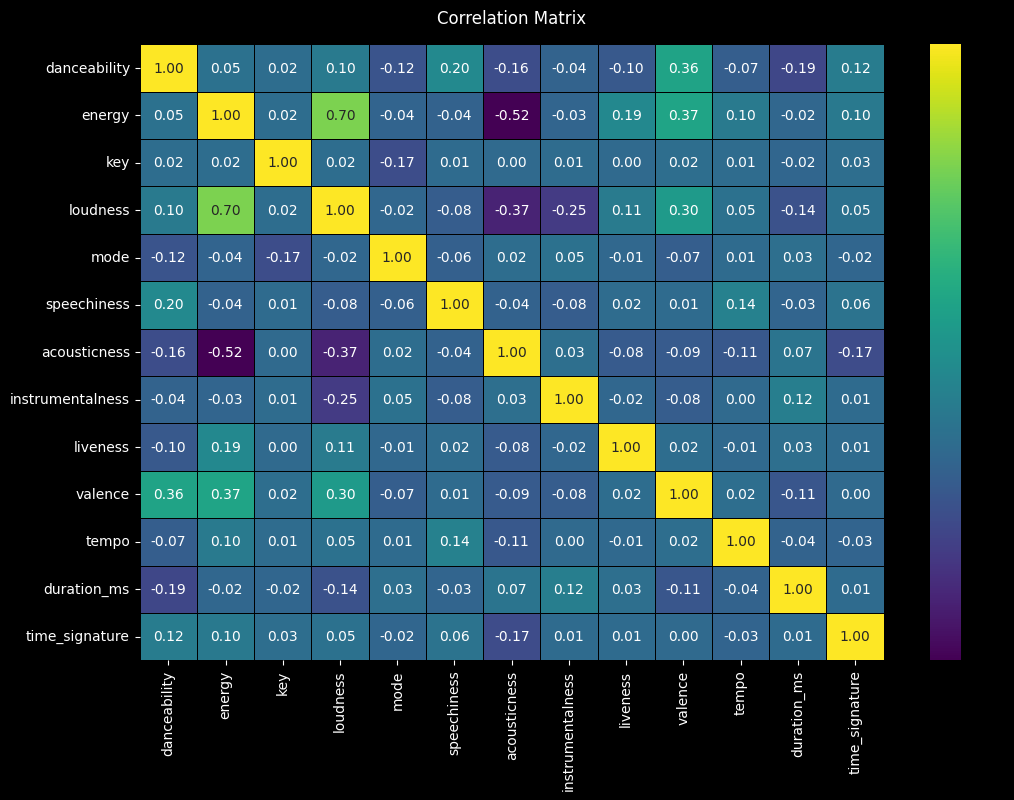

In [22]:
# Correlation matrix
correlation_matrix = numeric_df.corr()

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap=sns.color_palette("viridis", as_cmap=True), fmt='.2f', linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix', color='white', pad=15)  # Set title color to white
plt.gcf().set_facecolor('black')  # Set background color of the entire figure to black
heatmap.set_facecolor('black')  # Set background color of the heatmap to black
heatmap.tick_params(colors='white')  # Set tick color to white
# plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight', facecolor='black')  # Save as PNG with black background
plt.show()

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
numeric_df['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters
# sns.pairplot(numeric_df, hue='Cluster', palette='viridis')
# plt.show()

In [24]:
# Merge numeric_df with merged_df on 'valence' and 'tempo'
final_df = pd.merge(numeric_df, merged_df[['valence', 'tempo', 'Spotify Streams']], on=['valence', 'tempo'], how='inner')

Columns with NaN values in features: []
Columns with NaN values in features_imputed: False
Number of NaN values in target: 67


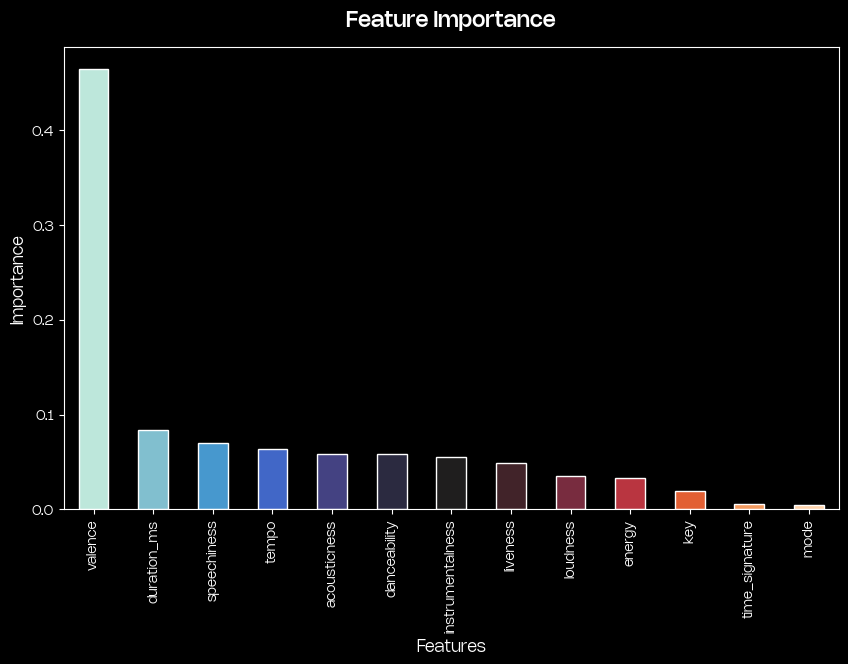

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer

# final_df' is already defined with 'Spotify Streams' and 'Cluster' columns dropped from features
features = final_df.drop(['Spotify Streams', 'Cluster'], axis=1)

# Check for NaN values in features
nan_columns = features.columns[features.isna().any()].tolist()
print("Columns with NaN values in features:", nan_columns)

# Impute NaN values with mean
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Check for NaN values after imputation
nan_columns_imputed = np.isnan(features_imputed).any()
print("Columns with NaN values in features_imputed:", nan_columns_imputed)

# Preprocess target to remove commas and convert to numeric
def preprocess_target(target):
    return target.str.replace(',', '').astype(float)

target = final_df['Spotify Streams']
target_numeric = preprocess_target(target)

# Check for NaN values in target_numeric
nan_target = target_numeric.isna().sum()
print(f"Number of NaN values in target: {nan_target}")

# Handle NaN values in target_numeric
target_imputer = SimpleImputer(strategy='mean')
target_imputed = target_imputer.fit_transform(target_numeric.values.reshape(-1, 1))

# Train model
model = RandomForestRegressor()

try:
    model.fit(features_imputed, target_imputed.ravel())  # ravel to convert 2D array to 1D
    importances = model.feature_importances_
    feature_importance = pd.Series(importances, index=features.columns).sort_values(ascending=False)

  # Load the custom fonts
    font_path_light = 'C:/Users/Victor Cardenas/Documents/PORTAFOLIO/public/fonts/Nohemi-Light.otf'
    font_prop_light = fm.FontProperties(fname=font_path_light)
    
    font_path_medium = 'C:/Users/Victor Cardenas/Documents/PORTAFOLIO/public/fonts/Nohemi-Medium.otf'
    font_prop_medium = fm.FontProperties(fname=font_path_medium, size=16)
    
    # Set the color palette for the bars
    color_palette = sns.color_palette("icefire", as_cmap=True)
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.title('Feature Importance', color='white', pad=15, fontproperties=font_prop_medium)
    
    # Set the plot background color
    plt.gcf().set_facecolor('black')
    
    # Customize the plot with the color palette
    ax = feature_importance.plot(kind='bar', color=color_palette(np.linspace(0, 1, len(feature_importance))), edgecolor = "white")
    
    # Set labels with custom font and color
    plt.ylabel('Importance', color='white', fontproperties=font_prop_light, fontsize=12)
    plt.xlabel('Features', color='white', fontproperties=font_prop_light, fontsize=12)
    
    # Customize the tick parameters for x and y axis
    plt.xticks(color='white', fontproperties=font_prop_light)
    plt.yticks(color='white', fontproperties=font_prop_light)
    
    # Customize the axes background color
    ax.set_facecolor('black')
    ax.spines['bottom'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.yaxis.label.set_color('white')
    ax.xaxis.label.set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    # plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight', facecolor='black')  # Save as PNG with black background

    plt.show()

except ValueError as e:
    print(f"Error during model fitting: {e}")


# Feature Engineering

In [26]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import joblib

# Extract features
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
            'duration_ms']


# Modeling

In [27]:
X_train = final_df[features]

# Train the model
model = IsolationForest(contamination=0.1, random_state=42)
model.fit(X_train)

# Save the model
joblib.dump(model, 'most_streamed_model_1.pkl')

print("Model trained and saved.")

Model trained and saved.


In [28]:
# import pandas as pd
# import joblib

# # Load the trained model
# model = joblib.load('most_streamed_model.pkl')

# # Load the new dataset
# new_playlist = pd.read_csv('spotify_playlist_audio_features_trial.csv')

# # Extract the relevant features for prediction
# features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
#             'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
#             'duration_ms']

# # Predict whether each song is "most streamed"
# new_playlist['Most_Streamed_Predicted'] = model.predict(new_playlist[features])

# # Convert predictions to Yes/No
# new_playlist['Most_Streamed_Predicted'] = new_playlist['Most_Streamed_Predicted'].apply(lambda x: 'Yes' if x == 1 else 'No')

# # Print the song names with their prediction results
# for idx, row in new_playlist.iterrows():
#     track_name = row['track']
#     artist_name = row['artist']
#     is_most_streamed = row['Most_Streamed_Predicted']
#     print(f"Track: {track_name} by {artist_name} - Most Streamed Predicted: {is_most_streamed}")


In [29]:
# import pandas as pd
# import joblib

# # Load the trained model
# model = joblib.load('most_streamed_model.pkl')

# # Load the new dataset
# new_playlist = pd.read_csv('spotify_boring_playlist.csv')

# # Extract the relevant features for prediction
# features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
#             'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
#             'duration_ms']

# # Predict whether each song is "most streamed"
# new_playlist['Most_Streamed_Predicted'] = model.predict(new_playlist[features])

# # Convert predictions to Yes/No
# new_playlist['Most_Streamed_Predicted'] = new_playlist['Most_Streamed_Predicted'].apply(lambda x: 'Yes' if x == 1 else 'No')

# # Print the song names with their prediction results
# for idx, row in new_playlist.iterrows():
#     track_name = row['track']
#     artist_name = row['artist']
#     is_most_streamed = row['Most_Streamed_Predicted']
#     print(f"Track: {track_name} by {artist_name} - Most Streamed Predicted: {is_most_streamed}")


In [30]:
# import pandas as pd
# import joblib

# # Load the trained model
# model = joblib.load('most_streamed_model.pkl')

# # Load the new dataset
# new_playlist = pd.read_csv('spotify_random_playlist.csv')

# # Extract the relevant features for prediction
# features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
#             'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
#             'duration_ms']

# # Predict whether each song is "most streamed"
# new_playlist['Most_Streamed_Predicted'] = model.predict(new_playlist[features])

# # Convert predictions to Yes/No
# new_playlist['Most_Streamed_Predicted'] = new_playlist['Most_Streamed_Predicted'].apply(lambda x: 'Yes' if x == 1 else 'No')

# # Print the song names with their prediction results
# for idx, row in new_playlist.iterrows():
#     track_name = row['track']
#     artist_name = row['artist']
#     is_most_streamed = row['Most_Streamed_Predicted']
#     print(f"Track: {track_name} by {artist_name} - Most Streamed Predicted: {is_most_streamed}")


In [31]:
# import pandas as pd
# import joblib

# # Load the trained model
# model = joblib.load('most_streamed_model.pkl')

# # Load the new dataset
# new_playlist = pd.read_csv('spotify_playlist_audio_features_trial.csv')

# # Extract the relevant features for prediction
# features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
#             'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
#             'duration_ms']

# # Predict outlier scores and labels
# new_playlist['Outlier_Score'] = model.decision_function(new_playlist[features])
# new_playlist['Most_Streamed_Predicted'] = model.predict(new_playlist[features])

# # Convert predictions to Yes/No
# new_playlist['Most_Streamed_Predicted'] = new_playlist['Most_Streamed_Predicted'].apply(lambda x: 'Yes' if x == 1 else 'No')

# # Print the song names with their prediction results
# for idx, row in new_playlist.iterrows():
#     track_name = row['track']
#     artist_name = row['artist']
#     is_most_streamed = row['Most_Streamed_Predicted']
#     print(f"Track: {track_name} by {artist_name} - Most Streamed Predicted: {is_most_streamed}")


In [32]:
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Load each dataset
df_trial = pd.read_csv('spotify_playlist_audio_features_trial.csv')
df_boring = pd.read_csv('spotify_boring_playlist.csv')
df_random = pd.read_csv('spotify_random_playlist.csv')

# Concatenate the datasets
merged_playlists_df = pd.concat([df_trial, df_boring, df_random], ignore_index=True)

# Load the trained model
model = joblib.load('most_streamed_model_1.pkl')

# Extract the relevant features for prediction
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
            'duration_ms']

# Predict outlier scores and labels
merged_playlists_df['Outlier_Score'] = model.decision_function(merged_playlists_df[features])
merged_playlists_df['Most_Streamed_Predicted'] = model.predict(merged_playlists_df[features])

# Convert predictions to Yes/No
merged_playlists_df['Most_Streamed_Predicted'] = merged_playlists_df['Most_Streamed_Predicted'].apply(lambda x: 'Yes' if x == 1 else 'No')

# Determine the threshold score used by the model
X_train = final_df[features]

# Calculate threshold score
train_scores = model.decision_function(X_train)
threshold_score = np.percentile(train_scores, 100 * model.contamination)

# Print the song names with their prediction results
for idx, row in merged_playlists_df.iterrows():
    track_name = row['track']
    artist_name = row['artist']
    is_most_streamed = row['Most_Streamed_Predicted']
    print(f"Track: {track_name} by {artist_name} - Most Streamed Predicted: {is_most_streamed}")


Track: LALA by Myke Towers - Most Streamed Predicted: Yes
Track: Flowers by Miley Cyrus - Most Streamed Predicted: Yes
Track: Flower by Moby - Most Streamed Predicted: Yes
Track: Your Love by The Outfield - Most Streamed Predicted: Yes
Track: Quevedo: Bzrp Music Sessions, Vol. 52 by Bizarrap, Quevedo - Most Streamed Predicted: Yes
Track: Cornfield Chase by Hans Zimmer - Most Streamed Predicted: No
Track: Experience by Ludovico Einaudi, Daniel Hope, I Virtuosi Italiani - Most Streamed Predicted: No
Track: Lose Yourself by Eminem - Most Streamed Predicted: No
Track: Houdini by Eminem - Most Streamed Predicted: Yes
Track: Song for Zula by Phosphorescent - Most Streamed Predicted: No
Track: Despacito by Luis Fonsi, Daddy Yankee - Most Streamed Predicted: Yes
Track: Iris by The Goo Goo Dolls - Most Streamed Predicted: Yes
Track: Chasing Cars by Snow Patrol - Most Streamed Predicted: Yes
Track: Yellow by Coldplay - Most Streamed Predicted: Yes
Track: The Scientist by Coldplay - Most Streamed

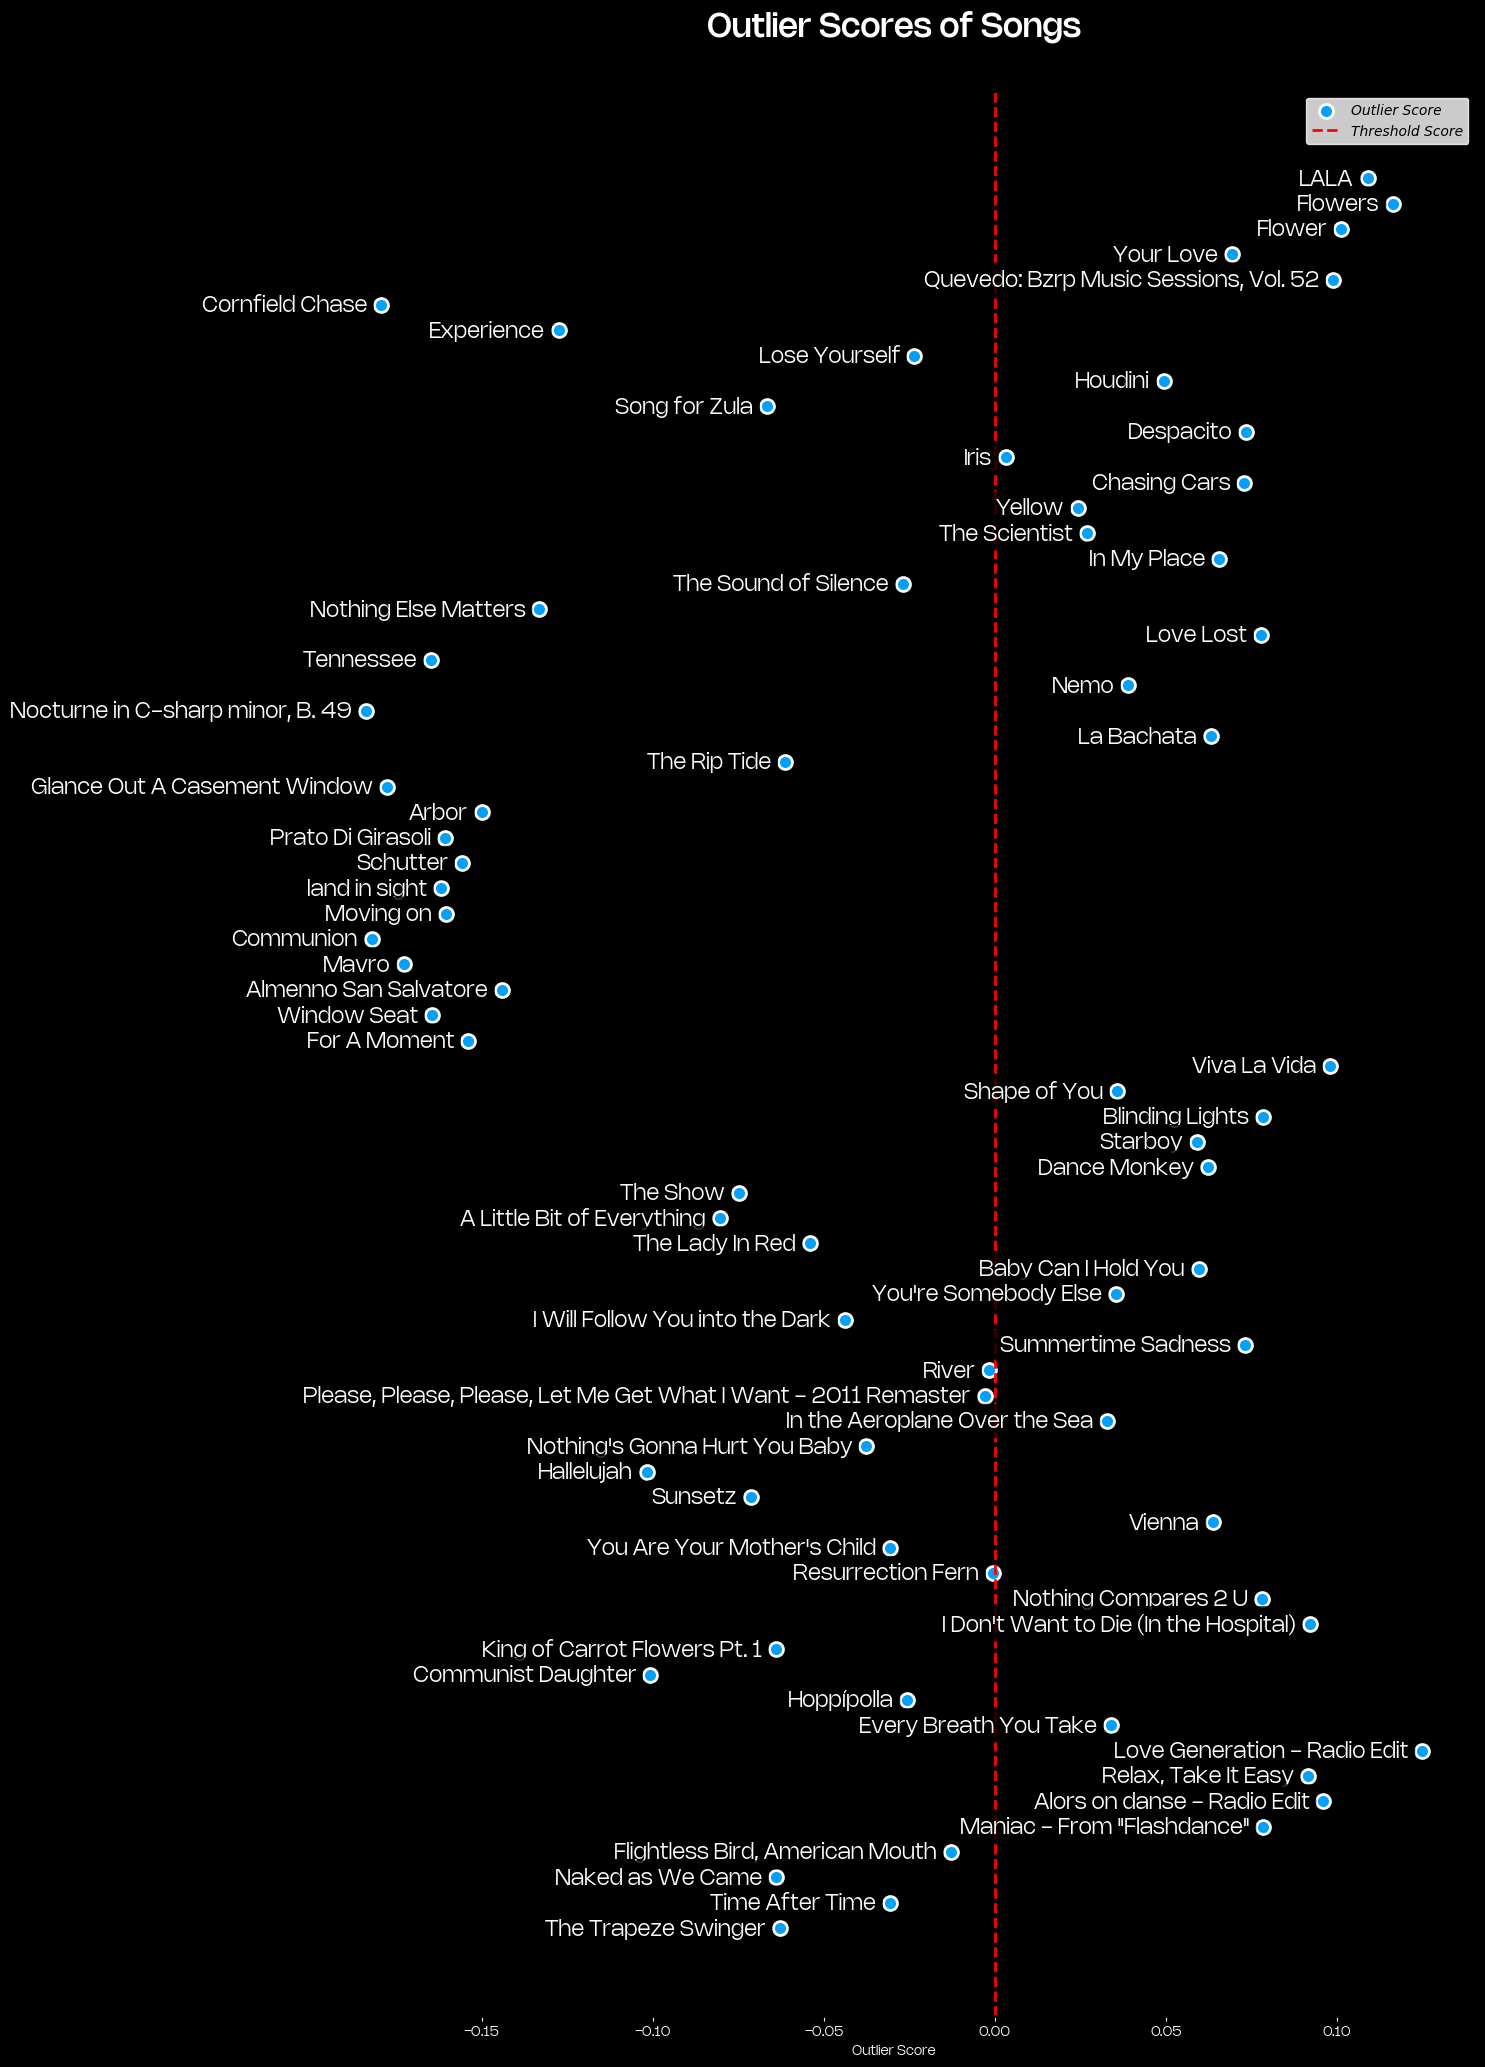

In [33]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np

# Load the custom fonts
font_path_light = 'C:/Users/Victor Cardenas/Documents/PORTAFOLIO/public/fonts/Nohemi-Light.otf'
font_path_medium = 'C:/Users/Victor Cardenas/Documents/PORTAFOLIO/public/fonts/Nohemi-Medium.otf'

# Define font properties
font_prop_light = fm.FontProperties(fname=font_path_light)
font_prop_medium = fm.FontProperties(fname=font_path_medium, size=24)  # Increase font size for medium font

# Plot outlier scores
plt.figure(figsize=(15, 25))  # Increase the height of the figure
scatter = plt.scatter(merged_playlists_df['Outlier_Score'], range(len(merged_playlists_df)), 
                      color='#03a0fb', edgecolor='white', linewidth=2.0, label='Outlier Score', s=100)
plt.axvline(x=threshold_score, color='red', linestyle='--', linewidth=2, label='Threshold Score')

# Annotate points with track names, adjust alignment and padding
for idx, row in merged_playlists_df.iterrows():
    plt.annotate(row['track'], 
                 (row['Outlier_Score'], idx), 
                 fontsize=16, 
                 ha='right', 
                 va='center', 
                 fontproperties=font_prop_light,
                 color='white',  # Font color
                 bbox=dict(boxstyle='round,pad=0.3', facecolor='black', edgecolor='none', alpha=0.8),
                 xytext=(-10, 0),  # Adjust label position (x, y)
                 textcoords='offset points')

# Customize plot appearance
plt.xlabel('Outlier Score', color='white', fontproperties=font_prop_light)
plt.title('Outlier Scores of Songs', color='white', fontproperties=font_prop_medium, pad=40)
plt.legend(prop={'size': 10, 'family': 'sans-serif', 'style': 'italic'}, edgecolor='white')

# Invert y-axis

# Invert y-axis
plt.gca().invert_yaxis()

# Customize background and grid
plt.gcf().set_facecolor('black')
plt.gca().tick_params(axis='x', colors='white')
plt.gca().tick_params(axis='y', which='both', left=False, labelleft=False)  # Hide y-axis ticks and labels

# Adjust plot borders
plt.gca().spines['top'].set_linewidth(2)   # Top border
plt.gca().spines['right'].set_linewidth(2) # Right border
plt.gca().spines['bottom'].set_linewidth(2) # Bottom border
plt.gca().spines['left'].set_visible(False)   # Hide left border

# Adjust tick labels
plt.xticks(color='white', fontproperties=font_prop_light)
plt.yticks(color='white', fontproperties=font_prop_light)

# Adjust the color of the scatter plot points
plt.gca().set_facecolor('black')  # Set the plot background to black
plt.savefig('outlier_scores.png', dpi=300, bbox_inches='tight', facecolor='black')  # Save as PNG with black background
plt.show()
